In [37]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from app.config import settings
from app.data import AlphaVantageAPI, SQLRepository

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Building Our Data Module
For our application, we're going to keep all the classes we use to extract, transform, and load data in a single module that we'll call data.

AlphaVantage API Class
Let's get started by taking the code we created in the last and incorporating it into a class that will be in charge of getting data from the AlphaVantage API.

In [5]:
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'app.data.AlphaVantageAPI'>


In [7]:
# Define Suzlon ticker symbol
ticker = "TSLA"

# Use your `av` object to get daily data
df_tsla = av.get_daily(ticker=ticker)

print("df_tsla type:", type(df_tsla))
print("df_tsla shape:", df_tsla.shape)
df_tsla.head()

df_tsla type: <class 'pandas.core.frame.DataFrame'>
df_tsla shape: (3714, 5)


,open,high,low,close,volume
date,,,,,
2025-04-02,254.600,284.99,251.2700,282.76,212787817.0
2025-04-01,263.800,277.45,259.2500,268.46,146486911.0
2025-03-31,249.310,260.56,243.3601,259.16,134008936.0
2025-03-28,275.575,276.10,260.5700,263.55,123809389.0
2025-03-27,272.480,291.85,271.8216,273.13,162572146.0


In [8]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_tsla, pd.DataFrame)

# Does DataFrame have 5 columns?
assert df_tsla.shape[1] == 5

# Does DataFrame have a DatetimeIndex?
assert isinstance(df_tsla.index, pd.DatetimeIndex)

# Is the index name "date"?
assert df_tsla.index.name == "date"

# Does DataFrame have correct column names?
assert df_tsla.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']

# Are columns correct data type?
assert all(df_tsla.dtypes == "float")

In [26]:
connection = sqlite3.connect(database = settings.db_name, check_same_thread = False)
print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


In [10]:
# Create instance of class
repo = SQLRepository(connection=connection)

In [11]:
# Does `repo` have a "connection" attribute?
assert hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [16]:
response = repo.insert_table(table_name=ticker, records=df_tsla, if_exists="replace")

In [17]:
# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

Write a basic query in SQL

In [44]:
settings.db_name

'stocks.sqlite'

In [12]:
import os
print(os.path.exists(r"C:\Users\jay\Desktop\Volatility\stocks.sqlite"))

True


In [27]:
df_suzlon = repo.read_table(table_name="suzlon.bse", limit=2500)

In [29]:
# Is `df_suzlon` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index named "date"?
assert df_suzlon.index.name == "date"

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape == (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume'] 

# Are the column data types correct?
assert all(df_suzlon.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-03-28 to 2015-02-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-03-28,57.48,58.37,56.40,56.60,11027630.0
2025-03-27,56.88,57.93,56.43,57.03,7595488.0
2025-03-26,57.85,58.60,56.31,57.47,5709899.0
2025-03-25,58.47,59.45,57.09,57.62,10877550.0
2025-03-24,57.66,58.36,57.06,57.92,3589959.0


In [18]:
ticker = "F"

# Get Ambuja data using `av`
ford_records = av.get_daily(ticker = ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(table_name=ticker, records=ford_records, if_exists="replace")

response

{'transaction_successful': True, 'records_inserted': 6394}

In [20]:
ticker = "F"
df_ford = repo.read_table(table_name = ticker, limit = 2500)

print("df_ford type:", type(df_ford))
print("df_ford shape:", df_ford.shape)
df_ford.head()

df_ford type: <class 'pandas.core.frame.DataFrame'>
df_ford shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-04-02,9.835,10.27,9.820,10.15,136908485.0
2025-04-01,10.100,10.17,9.810,9.94,135388684.0
2025-03-31,9.575,10.11,9.545,10.03,139951868.0
2025-03-28,9.840,9.89,9.620,9.72,136868327.0
2025-03-27,10.260,10.40,9.820,9.90,229032469.0


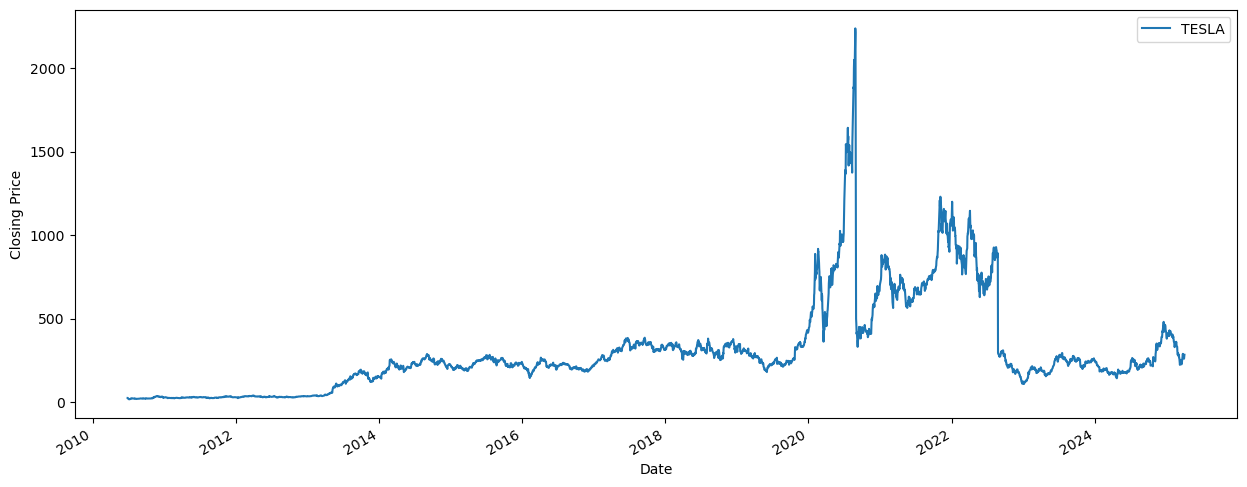

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ford` closing price
df_tsla["close"].plot(ax=ax, label = "TESLA")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Add legend
plt.legend()

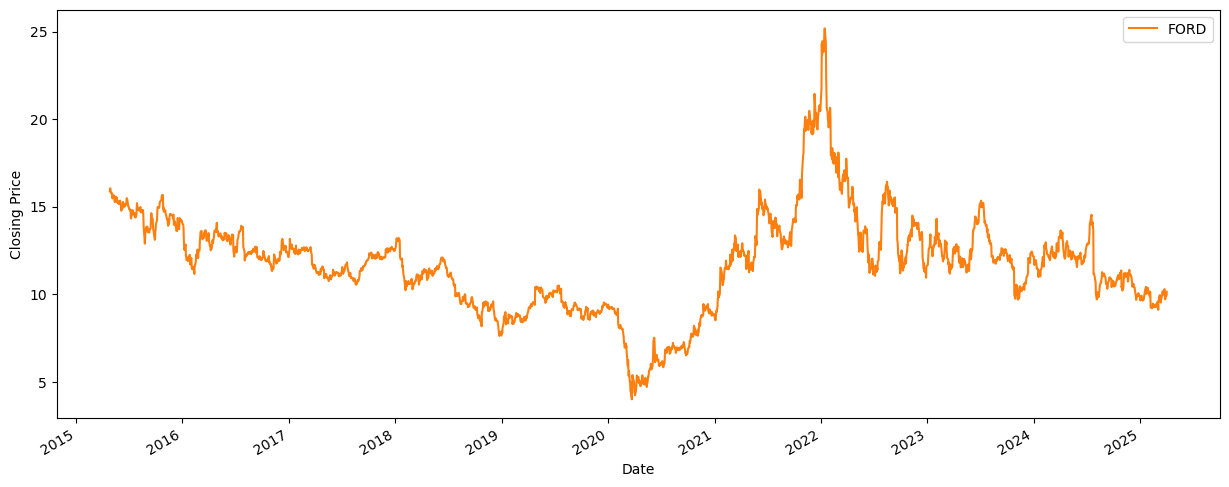

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ford` closing price
df_ford["close"].plot(ax=ax, label = "FORD", color = "C1")
# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Add legend
plt.legend()

Looking at this plot, we might conclude that Ford auto makers is a "better" stock than Tesla automakers because its price is higher. But price is just one factor that an investor must consider when creating an investment strategy. What is definitely true is that it's hard to do a head-to-head comparison of these two stocks because there's such a large price difference.

One way in which investors compare stocks is by looking at their returns instead. A return is the change in value in an investment, represented as a percentage. So let's look at the daily returns for our two stocks.

In [34]:
# Sort DataFrame ascending by date
df_ford.sort_index(ascending=True, inplace=True)

# Create "return" column
df_ford["return"] = df_ford["close"].pct_change() * 100

print("df_ford shape:", df_ford.shape)
print(df_ford.info())
df_ford.head()

df_ford shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-04-27 to 2025-04-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-04-27,15.82,16.00,15.77,15.90,34768339.0,NaN
2015-04-28,15.93,16.08,15.77,16.06,56606705.0,1.006289
2015-04-29,15.86,16.10,15.82,16.02,35122251.0,-0.249066
2015-04-30,15.97,16.04,15.74,15.80,30265757.0,-1.373283
2015-05-01,15.90,15.94,15.70,15.81,20602237.0,0.063291


In [33]:
df_tsla.sort_index(ascending = True, inplace = True)

# Create "return" column
df_tsla["return"] = df_tsla["close"].pct_change() * 100

print("df_tsla.shape:", df_tsla.shape)
print(df_tsla.info())
df_tsla.head()

df_tsla.shape: (3714, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3714 entries, 2010-06-29 to 2025-04-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3714 non-null   float64
 1   high    3714 non-null   float64
 2   low     3714 non-null   float64
 3   close   3714 non-null   float64
 4   volume  3714 non-null   float64
 5   return  3713 non-null   float64
dtypes: float64(6)
memory usage: 203.1 KB
None


,open,high,low,close,volume,return
date,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,NaN
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,-0.251151
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,-7.847251
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,-12.568306
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,-16.093750


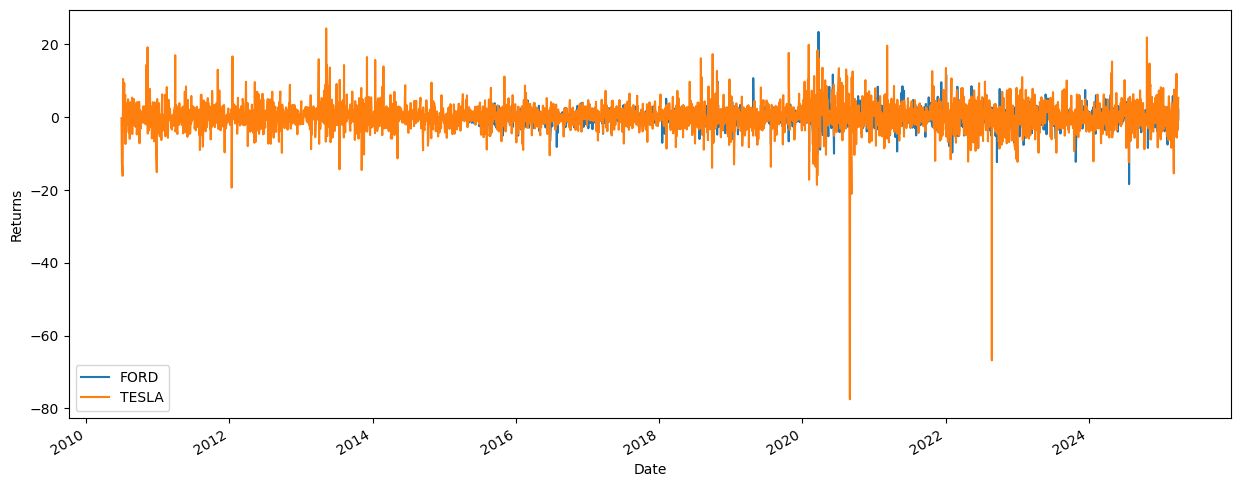

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot returns for `df_suzlon` and `df_ambuja`
df_ford["return"].plot(ax=ax, label = "FORD")
df_tsla["return"].plot(ax=ax, label = "TESLA")

# Label axes
plt.xlabel("Date")
plt.ylabel("Returns")

# Add legend
plt.legend()

Success! By representing returns as a percentage, we're able to compare two stocks that have very different prices. But what is this visualization telling us? We can see that the returns for Tesla have a wider spread. We see big gains and big losses. In contrast, the spread for ford is narrower, meaning that the price doesn't fluctuate as much.

Another name for this day-to-day fluctuation in returns is called volatility, which is another important factor for investors. So in the next lesson, we'll learn more about volatility and then build a time series model to predict it.

### API TESTS

In [ ]:
url = "http://localhost:8008/hello"
response = requests.get(url=url)

print("response code:", response.status_code)
response.json()

In [ ]:
# URL of `/fit` path
url = "http://localhost:8000/fit"

# Data to send to path
json = {
    "ticker": "IBM",
    "use_new_data": True,
    "n_observations": 2000,
    "p": 1,
    "q": 1
}
# Response of post request
response = requests.post(url=url, json=json)
# Inspect response
print("response code:", response.status_code)
response.json()

In [ ]:
# URL of `/predict` path
url = "http://localhost:8000/predict"
# Data to send to path
json = {
    "n_days": 5, 
    "ticker": "IBM",
    "use_new_data": False       
}
# Response of post request
response = requests.post(url=url, json=json)
# Response JSON to be submitted to grader
response.json()

In [ ]:
import requests
url = "http://localhost:8000/check_ticker"
json = {"ticker": "tesla"}
response = requests.post(url=url, json = json)
response.json()